# Skewness
## Definition
Skewness is a measure of the asymmetry of a probability distribution data. In a simple words, it shows the shape of the distribution whether the data are shifted to the left or right side of the distribution.

Formula of skewness from Fisher-Pearson moment coefficient of skewness:

$$Skew[X] = E\left[\left( \frac{X - \mu}{\sigma}\right)^3\right]$$



## Description
A normal distribution will shows zero skewness. Positively skewed distribution (right-skewed distribution) is the distribution which shifted to the left side and tail on the right side. Negatively skewed distribution (left-skewed distribution) is the distribution which shifted to the right side and tail on the left side.

## Demonstration and Diagram
The Normal Distribution, Right-Skewed Distribution and Left-Skewed Distribution were demostrated as below:

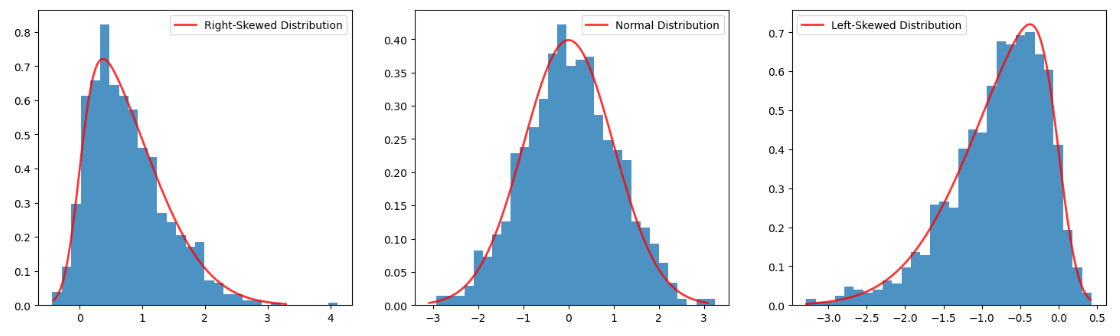

## Diagnosis
To check the skewness of a dataset, we can use statistical methods and visual method. Below are some of the common approaches:

1. Visually inspect the shape of the histogram of the dataset with a normal distribution graph. A skewed distribution will observed to have a longer tail on either side.
2. Calculate the skewness coefficient using phyton with command function: scipy.stats.skew()
3. Use Shapiro-Wilk Test to check the goodness-of-fit by examines the fitness of the sample data to the normal distribution.
4. Use QQ plot to check if the dataset is match with the distribution and are along with the 45-degrees line.

## Damage
Skewness in a dataset will impact on the statistical analysis. Skewness will violate the assumptions of normal distribution in hypothesis test, affecting the reliability of test results. Besides, skewed data may impact the biased machine models where these models will assume a normal distribution data.

## Directions
When the data doesn't exhibit normal distribution, we can address this issue by transforming the data to normal distribution. One of the most common method is Box and Cox method. Below shows the data transformation using Box and Cox method to transform a right skewed data to normally distributed data.

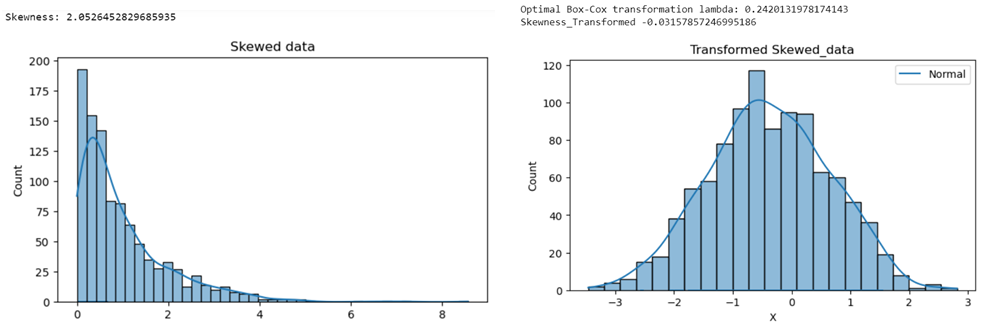

## Reference
1. "Skewness", Wikipedia, https://en.wikipedia.org/wiki/Skewness
2.  James Chen. "Skewness: Positively and Negatively Skewed Defined With Formula", Investopedia, https://www.investopedia.com/terms/s/skewness.asp
3.  Sebastian Taylor. "Skewness", https://corporatefinanceinstitute.com/resources/data-science/skewness/


# Heteroscedasticity
## Definition
Let $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ a sequence of random variables where variance of each term is $Var(\epsilon_i) = \sigma_i^2$

if $\sigma_i^2 \neq \sigma_j^2$ for *some* $(i, j) : i \neq j$ we conclude this sequence of random variables does not have constant variance and therefore the sequence is **heteroscedastic**.

## Description
In an OLS regression model where

$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ for $i = 0, 1, \ldots, n$

we assume the error terms $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ are iid and normally distributed with a mean of 0 and have constant variance, $\epsilon_i$ ~ $N(0, \sigma^2)$ for all $i$

If the assumption is true, then we say this sequence of error terms are **homoscedastic**. However, if the empirical data shows us that the variance of error terms are **not** constant, then we decide the sequence is **heteroscedastic**.

## Demonstration and Diagram

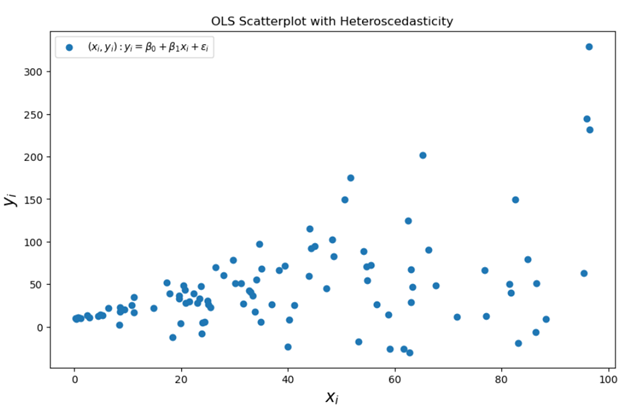

As we can see, because we defined the variance of simulated error terms as $Var(\epsilon_i) = x_i^2$, our data has **heteroscedasticity**, showing increasing $Y_i$ variance with increasing $x_i$ values.

Therefore, $Var(Y_i)$ has a **monotonic** relationship with $x_i^2$

## Diagnosis
To decide whether our sequence of random variables is homoscedastic or **heteroscedastic**, we have several options available.

* **Scatterplot inspection:** First, while doing an exploratory data analysis, we can just scatterplot the $y$ values against $x$ values and generate a visual. By inspecting the plot, if we observe a cone-like distribution of points, that is spread between points increases with increasing $x$ values, we decide that this distribution of $y$ values show **heteroscedasticity**. However, this method is a little bit subjective and informal.

* **Breusch-Pagan Test:** The Breusch-Pagan test is used in statistics to test for **heteroscedasticity** in a linear regression model. This is a chi-square test which assumes variance of error terms $\sigma^2_i$ have a **linear** relationship with independent variable values $x_i$. Its testing the hypotheses where:

$\qquad H_0:$ The sequence of error terms is **homoscedastic**

$\qquad H_1:$ The sequence of error terms is **heteroscedastic**

$\qquad$ Therefore after conducting the test, if $p < 0.05$, we reject the null hypothesis and decide the sequence of error terms is **heteroscedastic**.

Because $p << 0.05$, we decide with significant confidence that our error terms **does not** have equal variances and our data shows **heteroscedasticity**.


## Damage
Not accounting for **heteroscedastic** error terms and wrongly assuming all of them have the same variance may result in significant problems:

* **Poor Model Fit and Predictive Power:** A model that assumes homoscedasticity when the data is heteroscedastic may have poor explanatory and predictive power. This is because it may fail to capture the underlying structure and variability in the data.

* **Misleading Statistical Inference:** Standard statistical tests (like t-tests or F-tests) rely on assumptions of constant variance. Heteroscedasticity can lead to an underestimation or overestimation of the standard errors of coefficient estimates, resulting in misleading conclusions about the statistical significance of variables.

* **Inaccurate Estimations:** Models assuming homoscedasticity, such as OLS regression, may produce inefficient, biased, or inconsistent estimations of parameters. This inaccuracy can be particularly problematic in regression models, where heteroscedasticity can lead to biased and inconsistent estimates of regression coefficients.

* **Compromised Risk Assessment:** In financial contexts, where assessing and managing risk is crucial, heteroscedasticity often indicates that the risk (variance) changes over time or across different levels of an explanatory variable. Ignoring this can lead to underestimating or overestimating risk, which can have significant financial implications.

## Directions

After conducting a heteroscedasticity test such as **Breusch-Pagan** or **White** and deciding our data shows heteroscedasticity; we can move on to solve the problem.

A good way to handle heteroscedasticity is conducting a **Weighted Least Squares (WLS)** regression. In **WLS**, we can assign smaller weights to points where absolute value of the residuals are large (meaning error terms should have high variance) and assign larger weights to points where absolute value of the residuals are small. This means that the <u> weight $w_{i}$ will be inversely proportional to the variance of error term $Var(\epsilon_i)$ </u>:

$ \mathrm{Var}(\epsilon_{i}) = \sigma_{i}^{2} = \Large\frac{\sigma ^{2}}{w_{i}} $



Moreover, if we have a statistically significant $p$ value from a Breusch-Pagan test, we can estimate the variance of error terms $\hat{Var(\epsilon_i)} = \hat{\sigma_i^2}$ as a **linear function** of observed exogenous variable values where:

$\hat{\sigma_i^2} = \gamma_0 + \gamma_1 x_i$

To calculate our weight estimates, we first conduct an OLS regression and calculate our coefficient estimates $\beta_0, \beta_1$. We then fit our model and get residual values such that:

$r_i = y_i - \hat{y_i} = y_i - (\hat{\beta_0} + \hat{\beta_1} x_i) $

where $r_i$ is the residual value and $\hat{\beta_0}, \hat{\beta_1}$ are our coefficient estimates. Because we can think of $r_i^2$ as the observed value of the true variance $\sigma_i^2$, we can model residual values as a linear function of $x_i$ by using observed $r_i$ values from sample:

$ Var(\epsilon_i) = \sigma_i^2 = r_i^2 = \gamma_0 + \gamma_1 x_i + u_i$

where the objective function to be minimized is RSS: the residual sum of squares but here the residuals are $k_i = r_i^2 - \hat{r_i^2}$ and **not** the same with $r_i$.

$RSS(\beta_0, \beta_1) = \sum_{i=1}^n k_i^2 = \sum_{i=1}^n (r_i^2 - \hat{r_i^2})^2 = \sum_{i=1}^n (r_i^2 - (\gamma_0 + \gamma_1 x_i))^2 $

After we solve the minimization problem by setting the gradient to ${0}$, we get $\hat{\gamma_0}, \hat{\gamma_1}$ coefficient estimates. Then:

$ \hat{r_i^2} = \hat{\gamma_0} + \hat{\gamma_1} x_i = \hat{\sigma_i^2} $

And thus we have our estimated $\sigma_i^2$ values. After this, we can choose a constant $\sigma_2$ such as $\sigma_2 = 1$ and calculate our weights $w_i$:

$w_i = \Large\frac{1}{\hat{\sigma_i^2}}$

After we have our weights, we fit our WLS regression model such that our objective function to minimize is the following weighted residual sum of squares:

$ RSS(\beta_0, \beta_1) = \sum_{i=1}^n w_i r_i^2 = \sum_{i=1}^n w_i (y_i - (\beta_0 + \beta_1 x_i))^2 $

Solving the minimization problem, we get new $\hat{\beta_0}, \hat{\beta_1}$ coefficient estimates for our WLS model and complete our fitting with the linear regression function:

$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i $

We can do all of these steps in Python using statsmodels module:

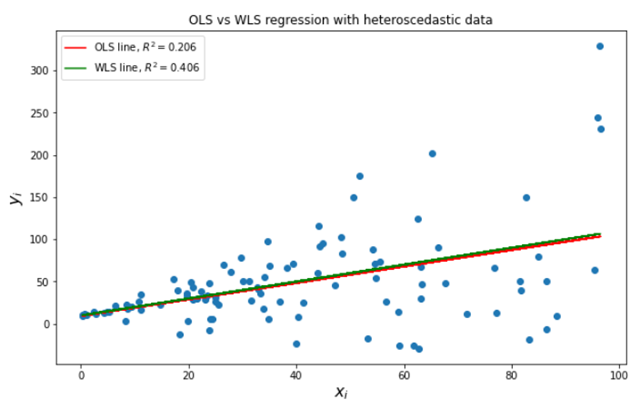

As we can see, by using **WLS** instead of **OLS**, we managed to improve our $R^2$ value significantly; thus handling the problem of heteroscedasticity.

## References
1. "Breusch–Pagan test", Wikipedia, https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test
2. "Weighted least squares", Wikipedia, https://en.wikipedia.org/wiki/Weighted_least_squares#:~:text=Weighted%20least%20squares%20(WLS)%2C,is%20incorporated%20into%20the%20regression.

# Kurtosis
## Definition
**Kurtosis** is a statistical measure used to determine whether the tails of a given distribution are heavier or lighter compared to those of a normal distribution.

## Description
A distribution is said to have a heavy tail if its tails are fatter than those of a normal distribution. This indicates a higher likelihood of extreme values occurring in the dataset.

Symmetric distributions are classified based on the shape of their tails. A normal distribution is termed **mesokurtic**. Distributions with fatter tails are known as **leptokurtic**, while those with lighter tails are called **platykurtic**.

The formula for kurtosis is :

$  \text{Kurtosis} = \sum_{i=1}^{n} \frac{(X_{i}-\bar{X})^{4}/N}{s^{4}}$

Thus, kurtosis is also called the fourth moment of a distribution.

In this context, a normal distribution exhibits a kurtosis value of $3$. Distributions with kurtosis greater than $3$ are considered to have fat tails, whereas those with kurtosis less than $3$ have thin tails.

## Demonstration and Diagram

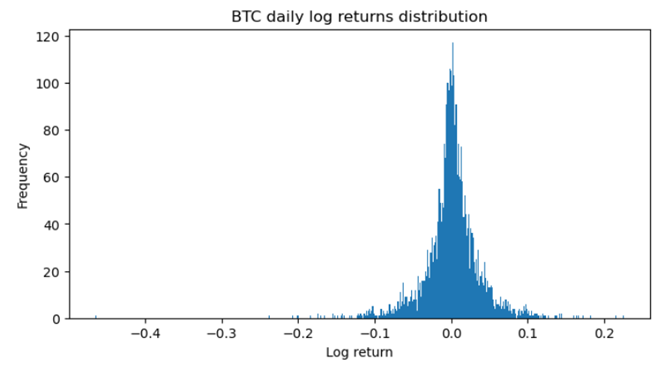

As can be seen visually, Bitcoin daily log returns show heavier tails compared to normal distribution and thus can be considered a **leptokurtic** distribution.

## Diagnosis
There are several ways for diagnosing kurtosis in a distribution:

* **Visual Inspection:** One of the simplest methods is to create a histogram or a density plot of the data. This visual representation can give an immediate sense of whether the distribution has fatter or thinner tails than a normal distribution.

* **Kurtosis Coefficient Calculation:** The kurtosis coefficient can be calculated using the fourth moment formula (described above): A kurtosis value of 3 indicates a normal distribution (mesokurtic). Values greater than 3 suggest heavy tails (leptokurtic), and values less than 3 indicate light tails (platykurtic).

* **Normality Tests:** While kurtosis is a measure of tail heaviness, it does not solely determine normality. Using normality tests like the Shapiro-Wilk test in conjunction with kurtosis analysis gives a more complete picture of the distribution's characteristics.

* **Q-Q Plot:** We can scatterplot our distribution against a normal distribution with same mean and variance, both ordered by quantiles, to check for normality and also whether kurtosis exists or not.

Let's use a Q-Q plot to diagnose kurtosis in BTC log returns in Python using statsmodels:

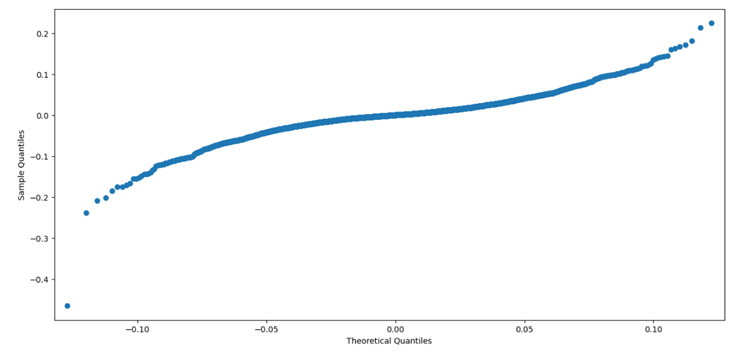

As we can see, our quantiles are not distributed linearly but instead curved on the edges. This means our distribution (BTC daily log returns) have heavy tails and has excess kurtosis.

## Damage

Kurtosis, particularly high kurtosis, can have significant implications in financial analysis and risk management:

* **Risk Management:** Standard risk management models often assume normal distributions. When the actual distribution of returns has high kurtosis, these models may not accurately capture the risk, leading to inadequate hedging strategies and potential unexpected losses.

* **Portfolio Optimization:** In portfolio optimization, the assumption of normality in return distributions can lead to misaligned risk-return trade-offs. High kurtosis might cause a portfolio to be more prone to extreme losses than anticipated, thereby affecting investment decisions.

* **Underestimation of Extreme Events:** High kurtosis, indicative of heavy tails, means that extreme values are more likely than what would be predicted by a normal distribution. In financial contexts, this can lead to the underestimation of the probability and potential impact of rare, extreme events, like market crashes or black swan events.

* **Stress Testing and Scenario Analysis:** Financial institutions use stress testing and scenario analyses to gauge potential losses under extreme conditions. If the actual distribution of returns has high kurtosis, these tests might not fully capture the extent of potential extreme outcomes.

## Directions

Addressing the problem of high kurtosis in financial data, especially when modeling financial returns or risks, requires the use of models other than normal distribution based models. These models can better accommodate the heavy tails often observed in financial data. Some of these include:

* **Student's t distribution:** Because it has heavier tails than the normal distribution (especially with lower degrees of freedom), Student's t distribution is useful to model usually heavy tailed financial data.

* **Copulas:** Useful in modeling the dependence structure between different financial instruments or markets, also allows for different marginal distributions, thus accommodating heavy tails.

## References
1. "Kurtosis", Wikipedia, https://en.wikipedia.org/wiki/Kurtosis
2. "Kurtosis", Corporate Finance Institute, https://corporatefinanceinstitute.com/resources/data-science/kurtosis/

# Sensitivity to Outliers
## Definition
Sensitivity to outliers can be considered as the degree to which the presence of extreme values in a dataset affects a statistical result or parameter.  Outliers are data points (cordinates) that are far from other data points in a data set (far from the average point), and they can cause problems in statistical analyses because they tend to change the true characteristics of the data under observation.


## Description
Outliers are data points (coordinates) that are far from other data points in a data set (far from the average point), and they can cause problems in statistical analyses because they tend to change the true characteristics of the data under observation.

## Demonstration and Diagram

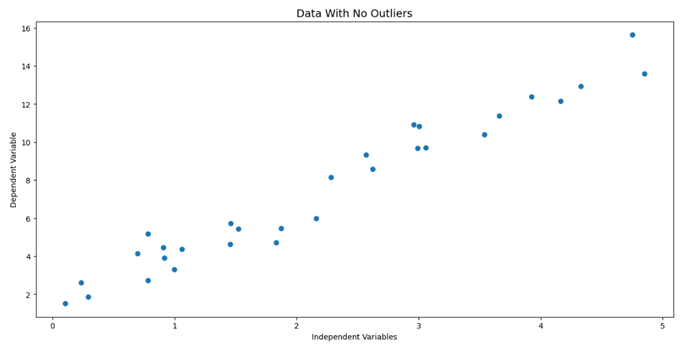

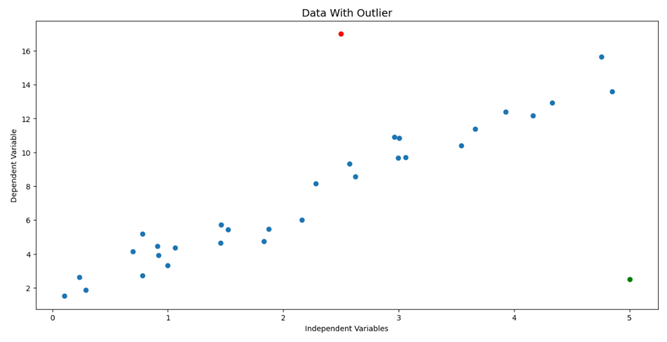

## Diagnosis
It is common in financial problems to have extreme points in the dataset. These extreme points can come from measurement errors when the data is recorded, incorrect data input or simply values that stand out.
There are several ways detect whether our sequence of random variables have outliers or not.
* **Sorting Method:** One way to address outliers is to arrange the data in ascending or descending order and manually look for *values that are far off compared to others.
* **Scatterplot/Residual Plot:** Whenever there are a few extreme points/outliers in our dataset, we can use plot the data on a graph such as a box plot, histogram, scatterplot or a residual plot to detect the extreme points manually. However, when there are a lot of outliers in our dataset, analyzing a scatterplot manually for outliers can consume significant time.
* **Statistical Tests:** One of the statistical tests that can be used to detect outliers is the Z-score  test, which calculates a standardized score for each data point and compares this with a threshold value which will highlight the exact standard deviation distance that indicates outliers.
* **Interquatile Range:** Another method to detect outliers involves calculating the first quatile(Q1), the third quatile (Q3), and the interquatile range (*IQR) of a dataset. 
  **The logic is as follows;** 
  Whenever a data point is less than $Q1 - 1.5*IQR$ , the data point can be considered as an Outlier (Low Outlier). 
  Whenever a data point is more than $Q1 + 1.5*IQR$ , the data point can be considered as an Outlier (High Outlier).


* **Robust Regression:** Robust regression is a method we can use in order for us to address extreme points in a model. A robust regression model is an adjusted regression model that is used to analyze a dataset and evaluate if a datset is contaminated with outliers. In a robust regression model, different objective functions are used/applied to reduce the impact of extreme values. There are several available methods of picking an objective function but our main focus will be the M-estimation method as well as the L1 regtression method.

## Damage
The damage caused by outliers to our model/ Clear statement of the damaged caused by the problem
* If Outliers are non-randomly distributed, they tend to decrease normality. As a result some statistical tests and models that require normaility can have their assumptions affected.
* Outliers reduce the power of statistical tests because they (Outliers) tend to increase the error variance in a dataset. This results in the statistical tests being unable to detect any real effects in the model.
* Some outliers are influential points in a sense that they can bias estimates. As a result of this, thwe estimates of the model parameters might not be accurate and the relationship between variables may be misinterpreted.
* Outliers can negatively impact regression models, they can pull away the best fit line from the average range. Thus, any predictions proposed by such models tend to be unreliable.
* Outliers can make normally distributed data to appear skewed and non-normal, thus impacting any prediction made by such models.

## Directions
After deducing that there are outliers in the dataset, we can use the Robust Regression.
Firstly we use the M-estimation method to calculate estimates which will help is in weighting the dataset.
The M-estimation uses the following Objective Function 
$$ RSS (\beta_{0}, \beta_{1}) = \sum_{i=1}^{n}  e_{i}^{2} = \sum_{i=1}^{n} ( Y_{i} - \beta_{0} - \beta_{1}  X\_{i} )^{2} $$

with respect to the coefficients $\beta_0 $ and $\beta_1 $ and compute $\hat{\beta}_0 $ and $\hat{\beta}_1 $ by solving the two equations associated with the first order conditions.

According to the objective function we want to minimise the sum of squared residuals for OLS regression. It is noticable that using squared residuals will put more emphesis of the outlier, thus the above objective function must be changed.
The proposed objective function for M-estimation is
$$ \sum_{i=1}^{n} \rho (e_{i}) = \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{t} \beta ) $$
Taking partial derivatives of this function gives 
$$ \sum_{i=1}^{n} \frac{\partial \rho}{\partial \beta} X_{i}^{t} = 0 $$

and assigning $\psi (e) = \frac{\partial \rho }{\partial e}$. $\ \psi$ will result in


$$ \sum_{i=1}^{n} \psi (e_{i}) X_{i}^{t} = 0 $$

To calculate estimates of M-estimattion we are going to use **iterative reweighted least squares** **regression (IRLS).**, the procedure is as follows
1. Use OLS to estimate initial coefficients.
2. Obtain the residuals of the OLS model and generate weights.
3. Estimate coefficients using WLS and the weights from Step 2.
4. Plug coefficients from WLS into the linear model and calculate new residuals and repeat from Step 2 to Step 4 until the coefficients converge

Once the M-estimates have been calculated, we can then go ahead and use the Huber and Bisquare methods to calculate the weights that are going to be assigned to each data point in our dataset including our outliers.

We use both Huber and Bisquare methods so that we can compare the result of the two methods, we will also compare the Huber and Bisquare methods with the Weighted Least Square regression models.

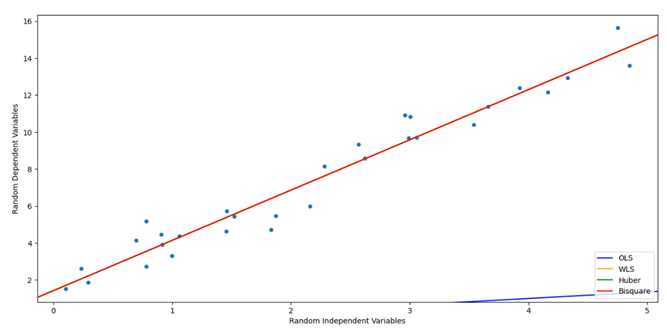

From the graph above it can be obeserved that in a dataset that has outliers, the best way to handle outliers is the usage of WLS and Huber, Bisquare. In the presence of outliers the OLS regression tend to be pulled by these extreme values.

## References
1. Roshandel, Reza. "Outliers in Statistical Analysis: How Serious They Are and What To Do." Medium, 26 March 2022
https://medium.com/@RezaRoshandel/outliers-in-statistical-analysis-how-serious-they-are-a23065479644
2. Chris Mack. "Lecture56 (Data2Decision) Robust Regression." Youtube, Oct 31, 2016
https://www.youtube.com/watch?v=7a_6roLjwaA&t=508s

# Over-reliance on the Gaussian Distribution
## Definition
Over-reliance on Gaussian distribution in the financial context means **wrongly assuming** a distribution, such as asset returns, to be normally distributed. If the real distribution shows non-normal qualities such as skewness, kurtosis or hetereoscedasticity; this might lead to underestimation of extreme events, misleading tail risk and improper risk management practices. Instead of wrongly using normal distribution, a financial practitioner should always use an appropriate model for non-normal distributions such as skew-normal distribution or Student's t distribution.